In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, make_scorer, f1_score
from scipy.stats import uniform, loguniform

In [4]:
df=pd.read_csv('/Users/sumitchougale/Downloads/digital_marketing_campaign_dataset.csv')

In [5]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [6]:
df=df.drop(columns=['CustomerID','AdvertisingPlatform','AdvertisingTool'])	

In [7]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
X=df.drop('Conversion',axis=1)

In [14]:
y=df[('Conversion')]

In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [16]:
num_features

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

In [17]:
cat_features

Index(['Gender', 'CampaignChannel', 'CampaignType'], dtype='object')

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [26]:
X = preprocessor.fit_transform(X)

In [28]:
X.shape

(8000, 24)

In [30]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from collections import Counter
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 4903, 0: 697})


In [34]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [36]:
import numpy as np

unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class distribution after SMOTE:", class_distribution)

Class distribution after SMOTE: {0: 4903, 1: 4903}


In [38]:
X_resampled.shape,X_test.shape

((9806, 24), (2400, 24))

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def report(model):
    # Generate predictions
    preds = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, preds))
    
    # Print accuracy score
    print(f'Accuracy: {accuracy_score(y_test, preds):.4f}')
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


              precision    recall  f1-score   support

           0       0.26      0.72      0.39       291
           1       0.95      0.72      0.82      2109

    accuracy                           0.72      2400
   macro avg       0.61      0.72      0.60      2400
weighted avg       0.87      0.72      0.77      2400

Accuracy: 0.7233


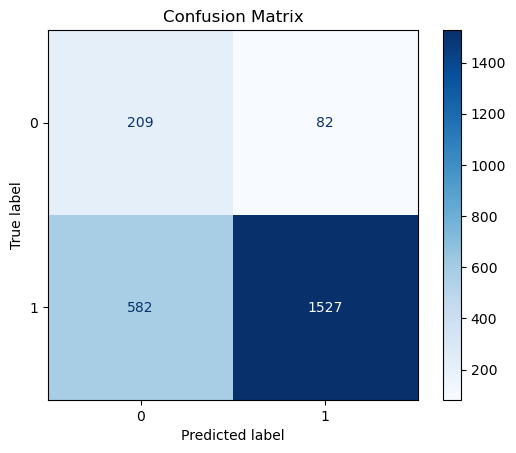

In [48]:
report(log_model)

In [25]:
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(0.01, 100),  # Continuous distribution for C
    'solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' support L1 regularization
}

In [26]:
scorer = make_scorer(f1_score, average='binary')

In [27]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [28]:
log_random_search = RandomizedSearchCV(log_reg, param_distributions, n_iter=50, cv=5, scoring=scorer, n_jobs=-1, random_state=42)


In [29]:
log_random_search.fit(X_resampled, y_resampled)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x159851cd0>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=binary))

In [30]:
print("Best Hyperparameters: ", log_random_search.best_params_)
print("Best F1 Score (Cross-Validation): ", log_random_search.best_score_)

Best Hyperparameters:  {'C': 0.0629064429458615, 'penalty': 'l1', 'solver': 'saga'}
Best F1 Score (Cross-Validation):  0.741820377457947


In [31]:
log_best_model = log_random_search.best_estimator_
best_preds = log_best_model.predict(X_test)

In [32]:
accuracy_score(y_test,best_preds)

0.7233333333333334

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt=DecisionTreeClassifier()

In [35]:
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.26      0.39      0.31       291
           1       0.91      0.85      0.88      2109

    accuracy                           0.79      2400
   macro avg       0.59      0.62      0.60      2400
weighted avg       0.83      0.79      0.81      2400

Accuracy: 0.7929


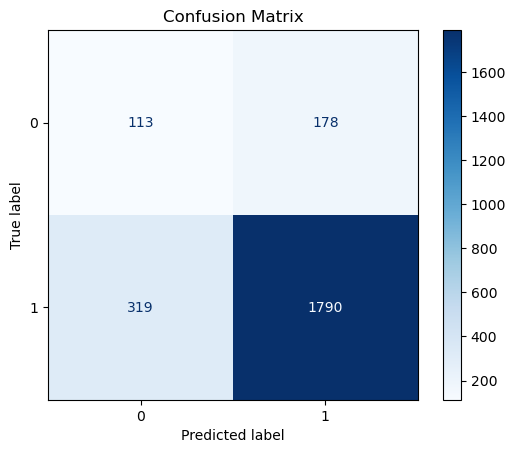

In [36]:
report(dt)

In [37]:
import random

In [38]:
from scipy.stats import randint
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': randint(2, 11),  # Randomly choose from 2 to 10
    'min_samples_leaf': randint(1, 11),    # Randomly choose from 1 to 4
    'max_features': ['sqrt', 'log2'],  # Remove 'auto'
    'criterion': ['gini', 'entropy']
}



In [39]:
dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
dt_random_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15958ee70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15ba1bda0>},
                   random_state=42, scoring='accuracy', verbose=2)

              precision    recall  f1-score   support

           0       0.26      0.42      0.32       291
           1       0.91      0.83      0.87      2109

    accuracy                           0.78      2400
   macro avg       0.59      0.63      0.60      2400
weighted avg       0.83      0.78      0.80      2400

Accuracy: 0.7837


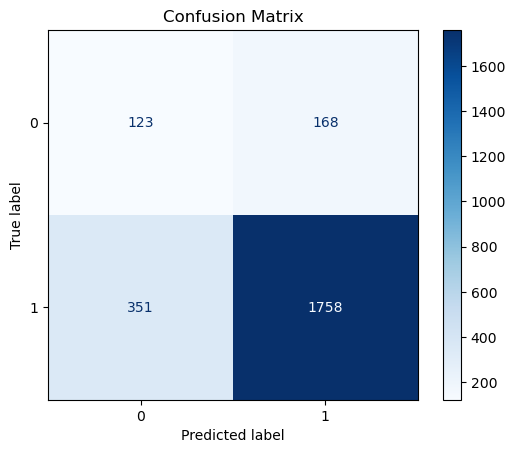

In [40]:
report(dt_random_search)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf=RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.72      0.32      0.45       291
           1       0.91      0.98      0.95      2109

    accuracy                           0.90      2400
   macro avg       0.82      0.65      0.70      2400
weighted avg       0.89      0.90      0.89      2400

Accuracy: 0.9025


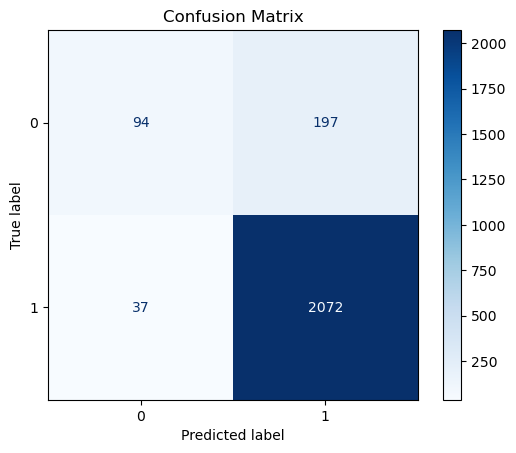

In [43]:
report(rf)

In [92]:
# Define the parameter space
param_dist = {
    'n_estimators': [100, 200, 300],  # Fewer values
    'max_depth': [10, 50, 100],  # Reduced range
    'min_samples_split': [2, 5],  # Fewer options
    'min_samples_leaf': [1, 2],  # Fewer options
    'max_features': ['sqrt', 'log2'],  # Removed None
    'bootstrap': [True],  # Fixed to True to reduce complexity
    'class_weight': [None, 'balanced']  # Fewer options
}


In [94]:
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,   # Use all available cores
    scoring='f1'  # Optimize for F1 score
)

In [96]:
random_search_rf.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1', verbose=2)

              precision    recall  f1-score   support

           0       0.74      0.32      0.44       291
           1       0.91      0.98      0.95      2109

    accuracy                           0.90      2400
   macro avg       0.82      0.65      0.69      2400
weighted avg       0.89      0.90      0.89      2400

Accuracy: 0.9033


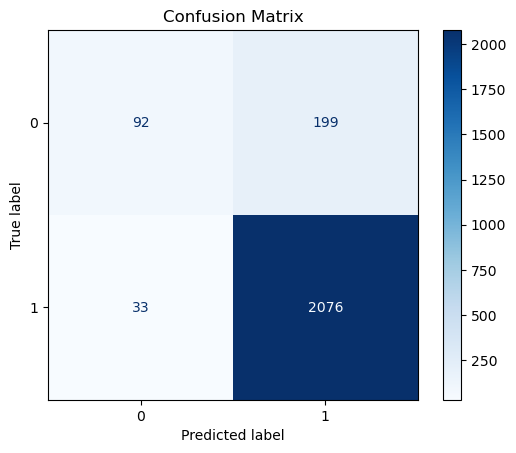

In [100]:
report(random_search_rf)

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
base_estimator = DecisionTreeClassifier(max_depth=1)

In [52]:
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,  # Number of weak learners to use
    learning_rate=1.0,  # The contribution of each classifier
    random_state=42  # For reproducibility
)

In [54]:
ada_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.30      0.44       291
           1       0.91      0.99      0.95      2109

    accuracy                           0.91      2400
   macro avg       0.89      0.65      0.70      2400
weighted avg       0.91      0.91      0.89      2400

Accuracy: 0.9092


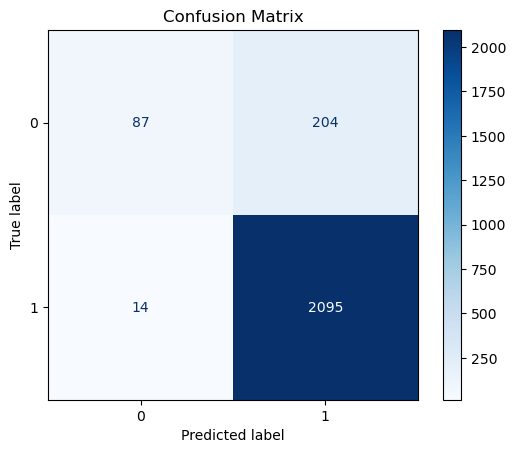

In [60]:
report(ada_clf)

In [91]:
base_estimator = DecisionTreeClassifier()

In [92]:
cv_ada_clf = AdaBoostClassifier(estimator=base_estimator)

In [84]:
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of AdaBoost estimators
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate for AdaBoost
    'estimator__max_depth': [1, 2, 3, 4, 5],  # Depth of the base decision tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'estimator__min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf
}

In [96]:
random_search_adaboost= RandomizedSearchCV(
    cv_ada_clf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random configurations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

In [98]:
random_search_adaboost.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'estimator__max_depth': [1, 2, 3, 4, 5],
                                        'estimator__min_samples_leaf': [1, 2,
                                                                        4],
                                        'estimator__min_samples_split': [2, 5,
                                                                         10],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [101]:
print("Best hyperparameters: ", random_search_adaboost.best_params_)

Best hyperparameters:  {'n_estimators': 100, 'learning_rate': 0.5, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 1}


In [105]:
best_model_adaboost =  random_search_adaboost.best_estimator_

              precision    recall  f1-score   support

           0       0.91      0.21      0.34       291
           1       0.90      1.00      0.95      2109

    accuracy                           0.90      2400
   macro avg       0.91      0.60      0.64      2400
weighted avg       0.90      0.90      0.87      2400

Accuracy: 0.9012


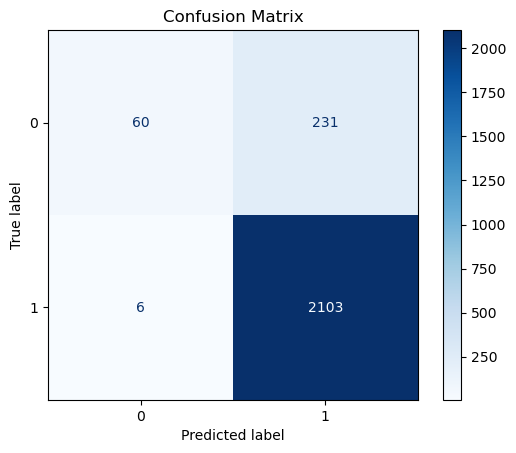

In [107]:
report(best_model_adaboost)

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb

In [52]:
xgmodel = xgb.XGBClassifier(
    objective='binary:logistic',  # Change to 'multi:softmax' for multiclass classification
    eval_metric='logloss',        # You can use other metrics like 'auc', 'error', etc.
        )

In [54]:


xgmodel.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.78      0.46      0.58       291
           1       0.93      0.98      0.96      2109

    accuracy                           0.92      2400
   macro avg       0.85      0.72      0.77      2400
weighted avg       0.91      0.92      0.91      2400

Accuracy: 0.9187


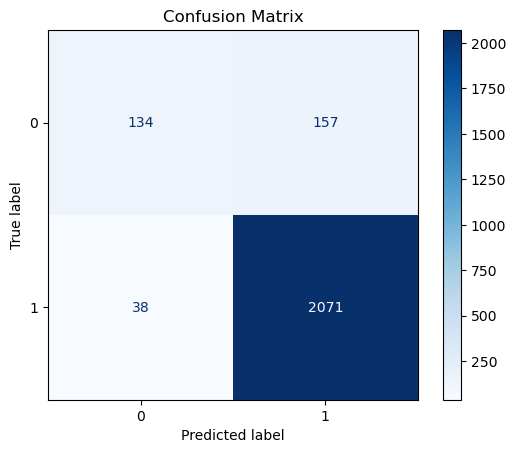

In [56]:
report(xgmodel)

In [109]:
from scipy.stats import randint
param_dist_xg = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'min_child_weight': randint(1, 20),
}

In [111]:
xg_random_search = RandomizedSearchCV(
    estimator=xgmodel,
    param_distributions=param_dist_xg,
    n_iter=150,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)


In [113]:
xg_random_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17db3bd70>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17d2ff080>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17da85280>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1757f8590>},
                   random_state=42, scoring='accuracy', verbose=1)

              precision    recall  f1-score   support

           0       0.75      0.41      0.53       291
           1       0.92      0.98      0.95      2109

    accuracy                           0.91      2400
   macro avg       0.84      0.70      0.74      2400
weighted avg       0.90      0.91      0.90      2400

Accuracy: 0.9125


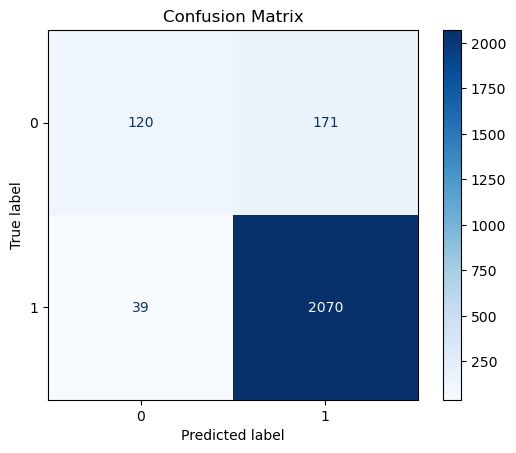

In [107]:
report(xg_random_search)